In [ ]:
!pip install eleanor

     |████████████████████████████████| 6.7 MB 3.7 MB/s 
     |████████████████████████████████| 832 kB 22.9 MB/s 
     |████████████████████████████████| 245 kB 48.8 MB/s 
     |████████████████████████████████| 4.4 MB 32.8 MB/s 
     |████████████████████████████████| 110.5 MB 367 bytes/s 
     |████████████████████████████████| 22.3 MB 81.0 MB/s 
     |████████████████████████████████| 98 kB 8.4 MB/s 
     |████████████████████████████████| 41 kB 205 kB/s 
     |████████████████████████████████| 802 kB 36.5 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 3.2 MB 41.5 MB/s 
     |████████████████████████████████| 3.8 MB 23.0 MB/s 
     |████████████████████████████████| 503 kB 53.6 MB/s 
     |████████████████████████████████| 2.9 MB 29.0 MB/s 
     |████████████████████████████████| 20.1 MB 116.5 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
  Created wheel for eleanor: filename=eleanor-2.0.3-py2.py3-none-any.whl s

In [ ]:
import eleanor
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

In [ ]:
star = eleanor.Source(name='WASP-101')

Most recent sector available =  39
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 33...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 33 now available.


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


In [ ]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True, regressors='corner')

100%|██████████| 3495/3495 [00:59<00:00, 58.27it/s]


Text(0.5, 1.0, 'WASP-101')

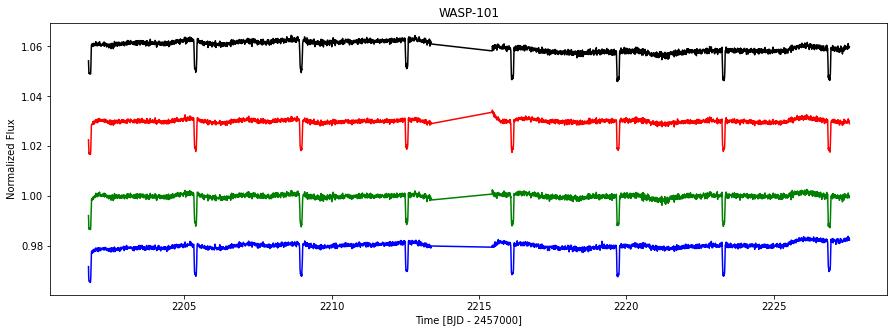

In [ ]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'g')
plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('WASP-101')

In [ ]:
data.bkg_type

'PC_LEVEL'

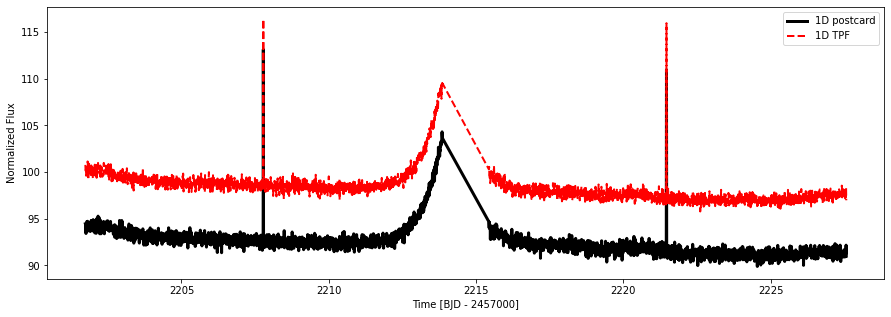

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(data.time, data.flux_bkg, 'k', label='1D postcard', linewidth=3)
plt.plot(data.time, data.tpf_flux_bkg, 'r--', label='1D TPF', linewidth=2)
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.legend();

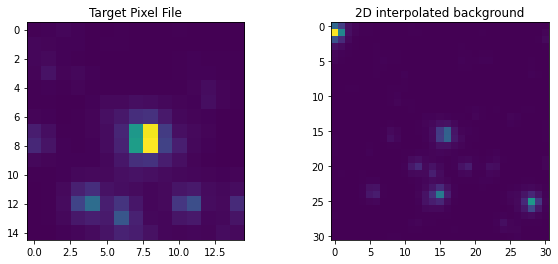

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.bkg_tpf[0])
ax2.set_title('2D interpolated background');

Text(0.5, 1.0, 'Aperture')

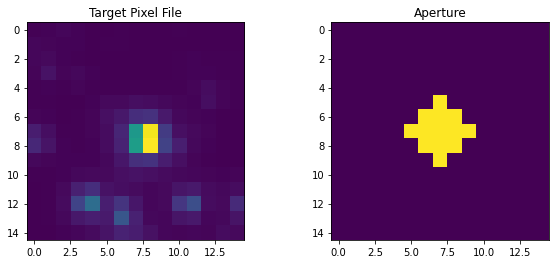

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.aperture)
ax2.set_title('Aperture')

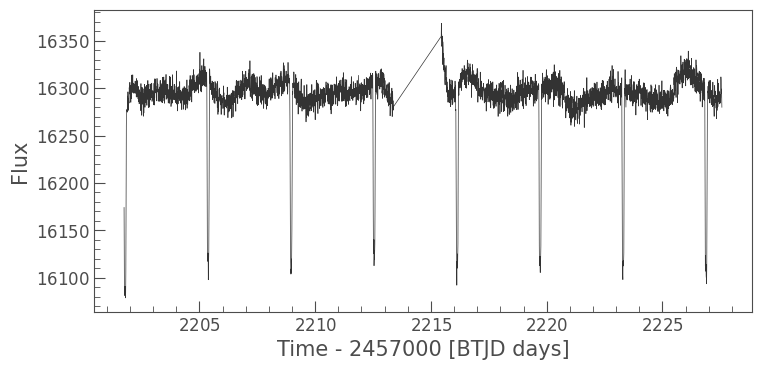

In [ ]:
lk = data.to_lightkurve()
lk.plot()

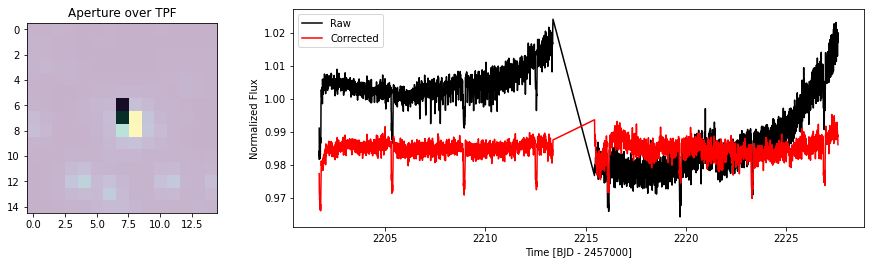

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.all_apertures[0], cmap='Greys', alpha=0.7)
ax1.set_title('Aperture over TPF')

ax2.plot(data.time[q], data.all_raw_flux[0][q]/np.nanmedian(data.all_raw_flux[0][q]), 'k', label='Raw')
ax2.plot(data.time[q], data.all_corr_flux[0][q]/np.nanmedian(data.all_corr_flux[0][q]) - 0.015, 'r', label='Corrected')
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux')
ax2.legend()

Text(0, 0.5, 'Normalized Flux')

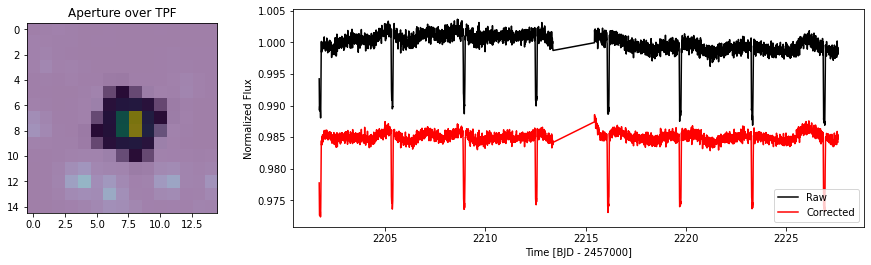

In [ ]:
eleanor.TargetData.custom_aperture(data, shape='rectangle', h=5, w=5, theta=90)
eleanor.TargetData.get_lightcurve(data)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.aperture, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

ax2.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 'k', label='Raw')
ax2.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) - 0.015, 'r', label='Corrected')
ax2.legend()
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux')

Text(0, 0.5, 'Normalized Flux')

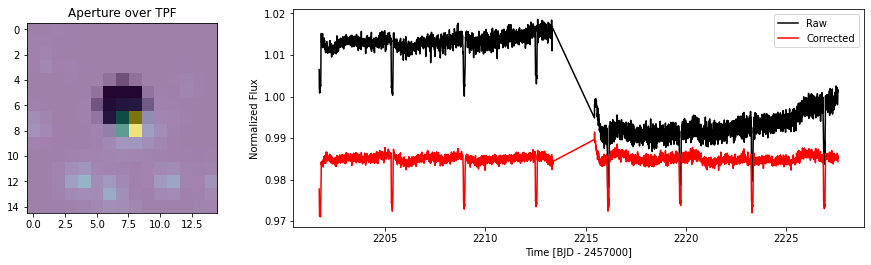

In [ ]:
eleanor.TargetData.custom_aperture(data, shape='circle', r=2, pos=[7,6], method='exact')
eleanor.TargetData.get_lightcurve(data)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.aperture, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

ax2.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 'k', label='Raw')
ax2.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) - 0.015, 'r', label='Corrected')
ax2.legend()
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux')

In [ ]:
eleanor.TargetData.psf_lightcurve(data, model='gaussian')

100%|██████████| 3495/3495 [01:00<00:00, 57.75it/s]


In [ ]:
vis = eleanor.Visualize(data)

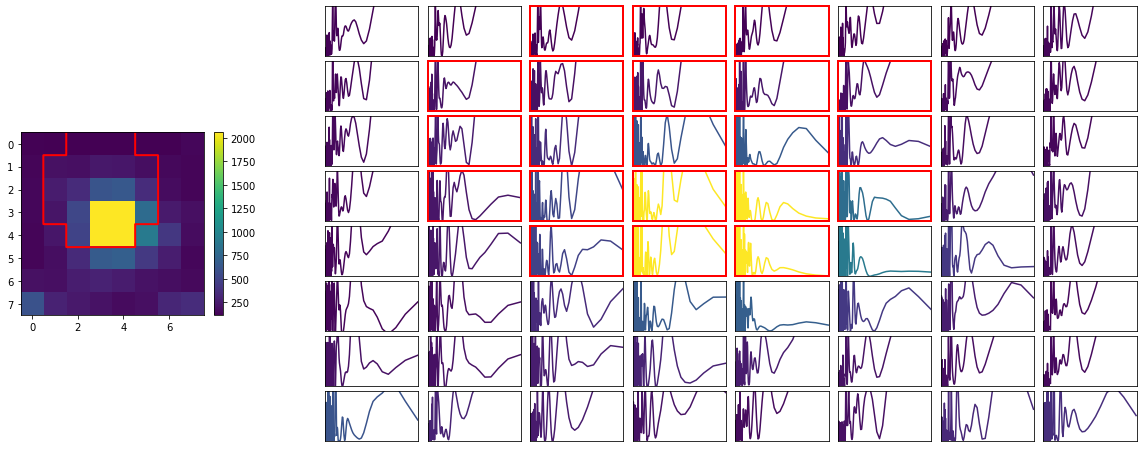

In [ ]:
lomb = vis.pixel_by_pixel(colrange=[4,12], rowrange=[4,12], data_type="periodogram",
                        color_by_pixel=True)